# Convex Pattern Data Creation

50
0


c:\users\a661249\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


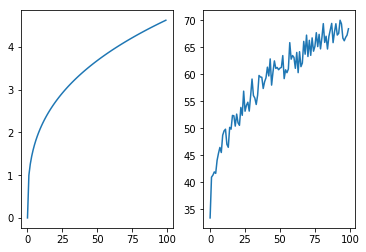

1


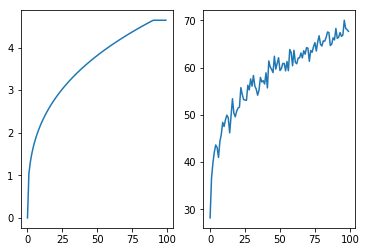

2


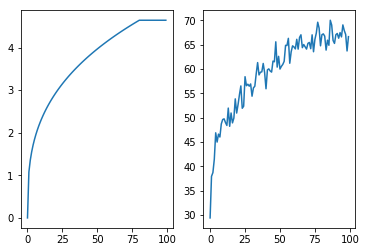

3


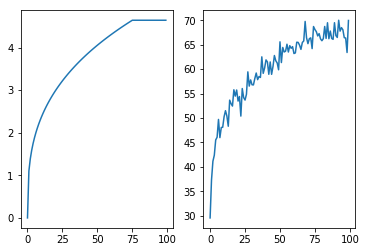

4


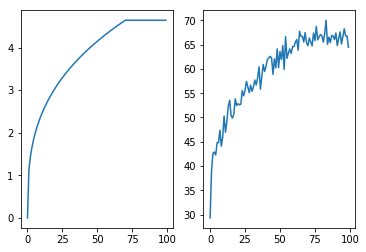

5


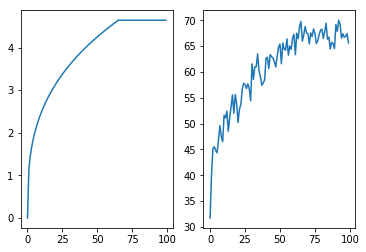

6


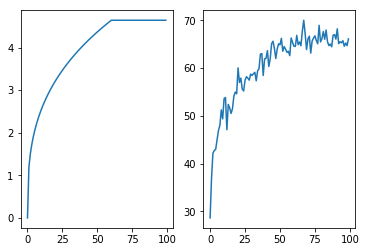

7


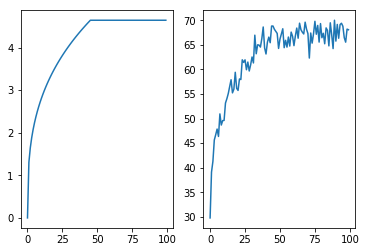

8


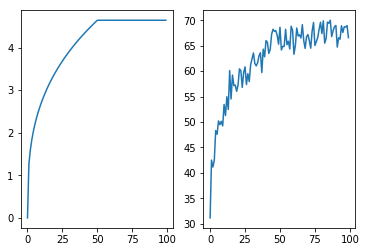

9


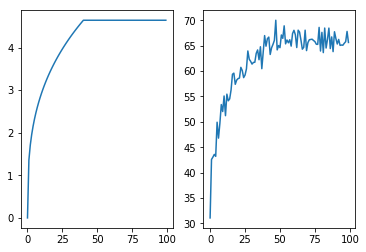

10


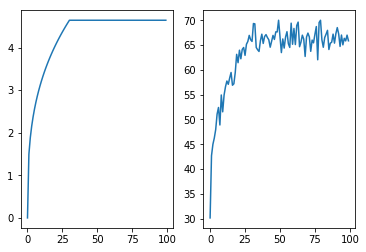

11


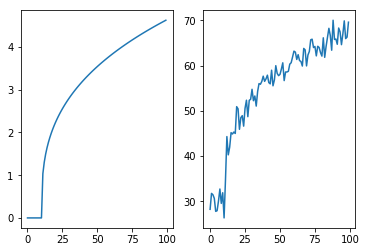

12


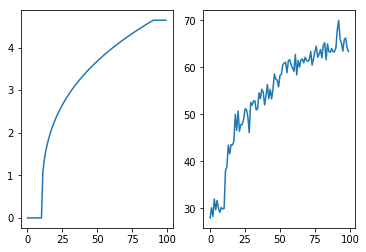

13


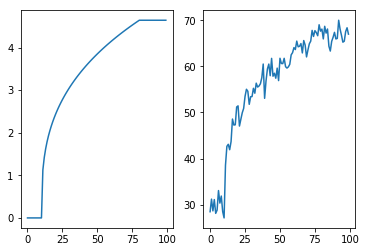

14


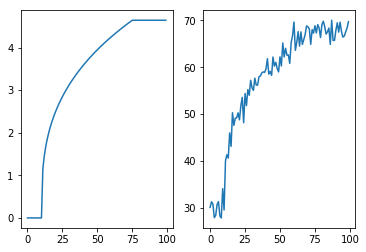

15


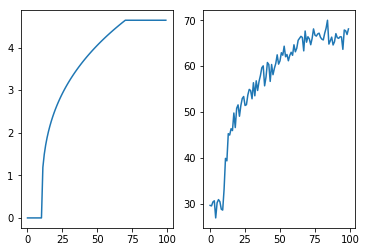

16


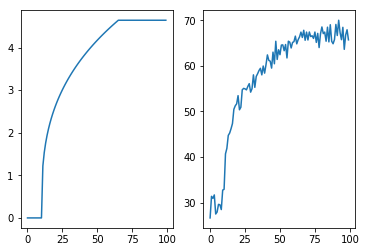

17


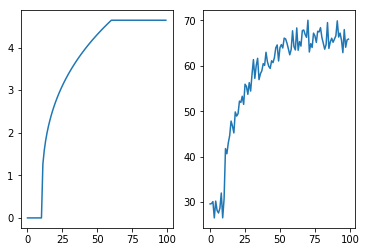

18


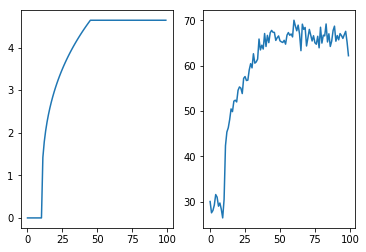

19


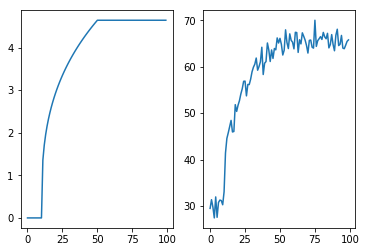

20


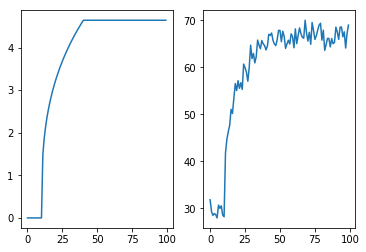

21


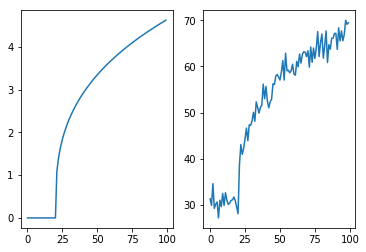

22


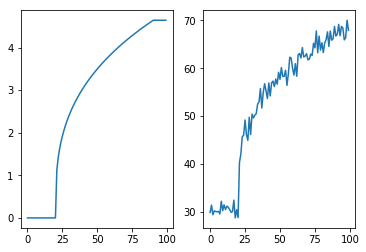

23


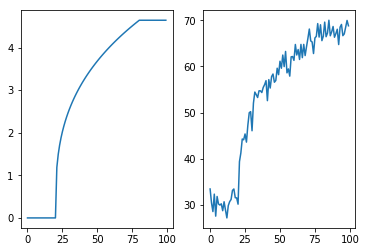

24


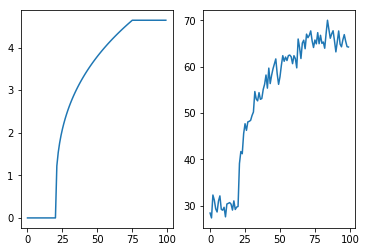

25


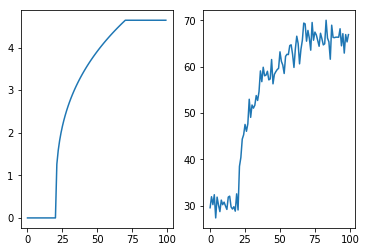

26


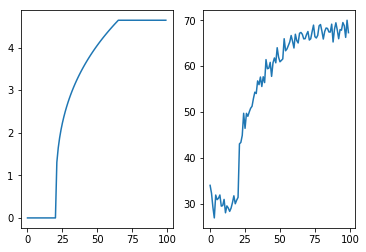

27


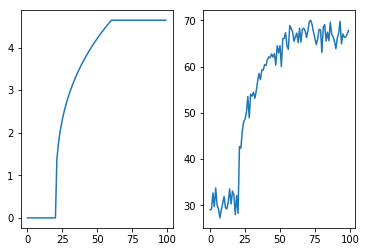

28


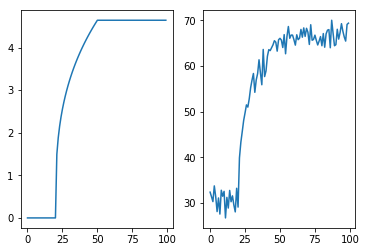

29


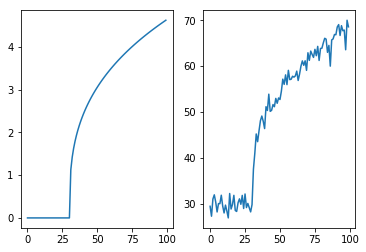

30


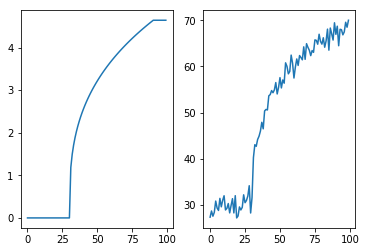

31


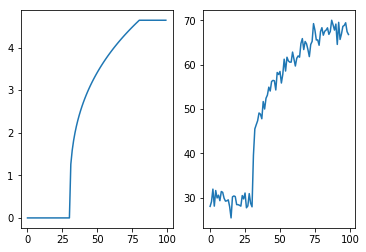

32


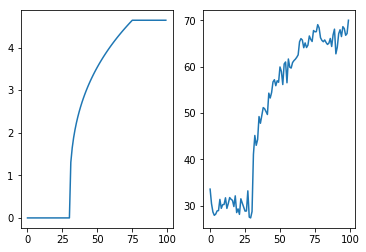

33


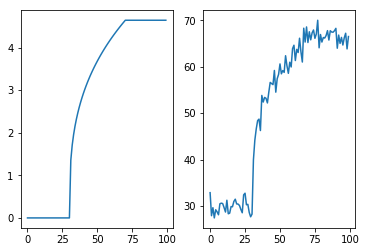

34


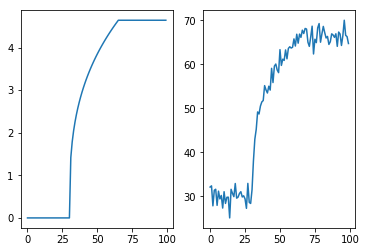

35


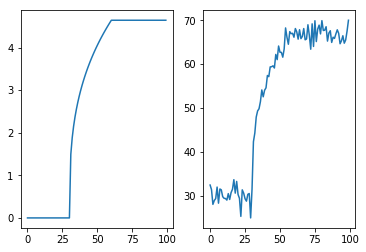

36


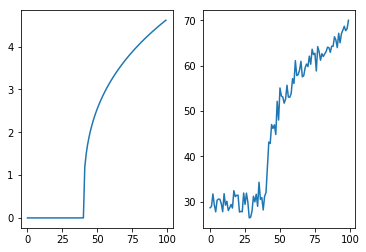

37


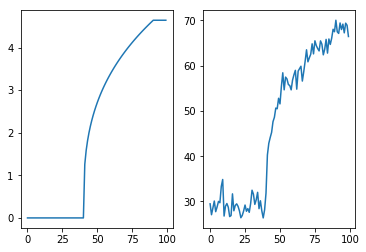

38


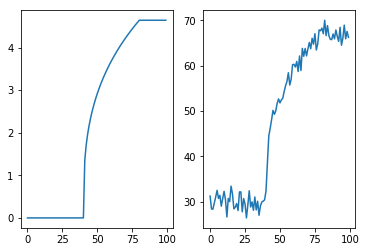

39


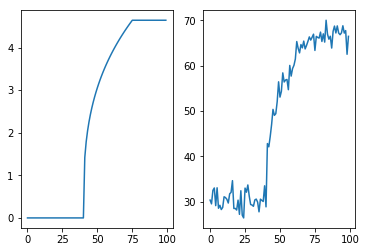

40


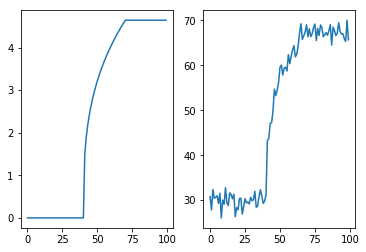

41


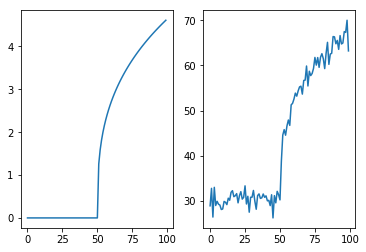

42


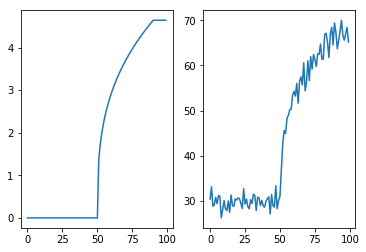

43


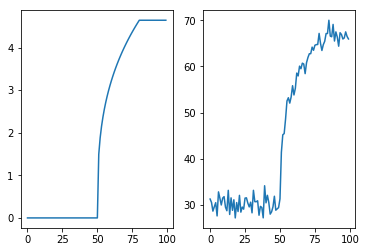

44


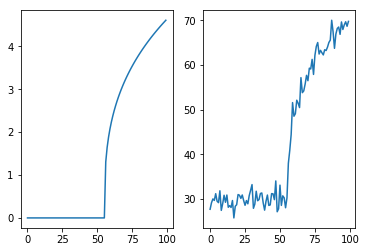

45


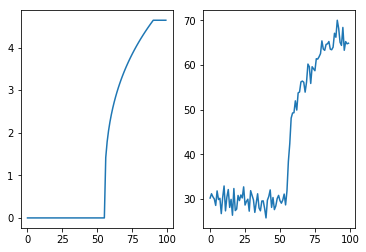

46


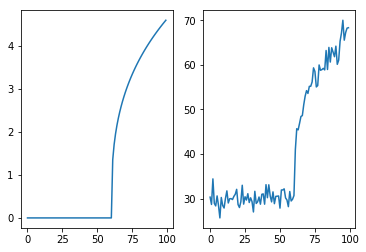

47


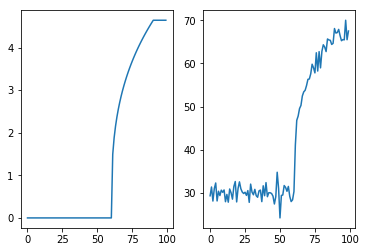

48


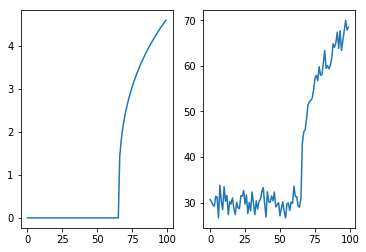

49


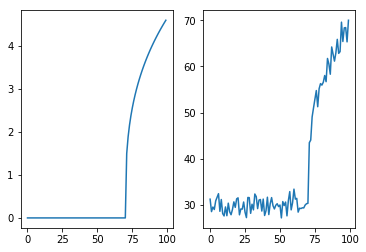

In [25]:
## Load Library
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd

## Definations
def Generate_pattern_with_both_ends(x,min_value,max_value,start_distance,end_distance):
    total_points=100
    k=0
    for i in range(start_distance.shape[0]):
        left_points=total_points-start_distance[i]-end_distance
        ## Finding Slope if end_distance is varying
        slope=(max_value-min_value)/left_points
        for j in range(slope.shape[0]):
            if(left_points[j]<30):
                continue;
            out=np.arange(min_value,max_value,slope[j])
            end_index=out.shape[0] + start_distance[i]
            x[k,0:start_distance[i]]=min_value
            x[k,start_distance[i]:end_index]=out
            x[k,end_index:]=max_value  
            x[k]=np.cbrt(x[k])
            k=k+1
    return x,k
    
    

## Initiaisation
total_points=100
no_of_shifts=60

## Defining array where all shifted version will be saved
x=np.zeros([no_of_shifts,total_points])

start_distance=np.array([0,10,20,30,40,50,55,60,65,70])
end_distance=np.array([0,10,20,25,30,35,40,55,50,60,70])
## Generate_pattern with varying slope
x,index=Generate_pattern_with_both_ends(x,0,100,start_distance,end_distance)
noise=np.random.normal(0,0.2,[index,100])
signal=x[:index]+noise
print(index)
for i in range(index):
    signal[i]=((signal[i]/max(signal[i]))*40)+30
    print(i)
    plt.subplot(121)
    plt.plot(x[i])
    plt.subplot(122)
    plt.plot(signal[i])
    plt.show()
    
label=np.chararray(index,itemsize=50)
label[:]='Convex_increase_with_constant_ends'
sig=pd.DataFrame({'Pattern':label})
sig=sig.join(pd.DataFrame(signal[0:index]))

#sig=pd.DataFrame(signal[0:index])
#sig.to_csv('Steep_rise_with_shifts.csv',index=False)


50
0


c:\users\a661249\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in long_scalars
c:\users\a661249\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


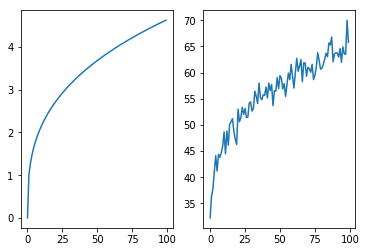

1


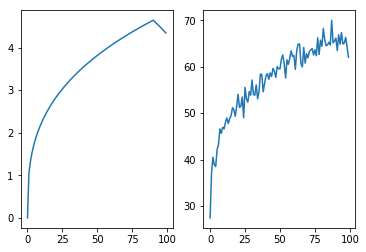

2


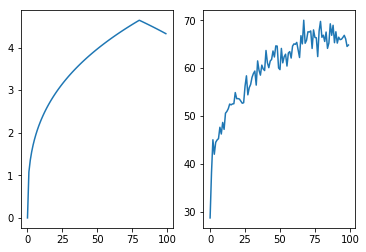

3


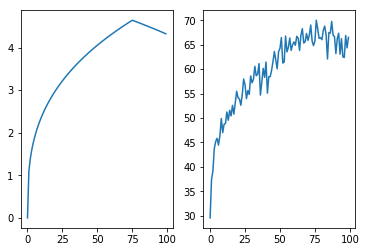

4


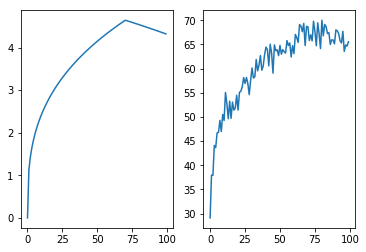

5


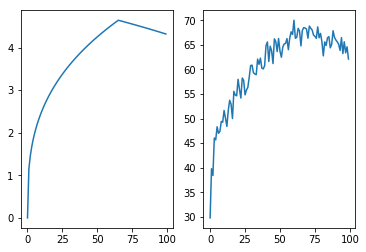

6


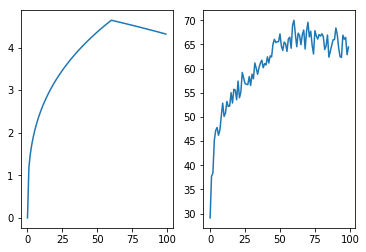

7


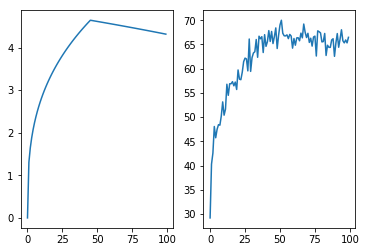

8


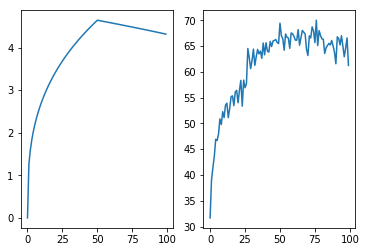

9


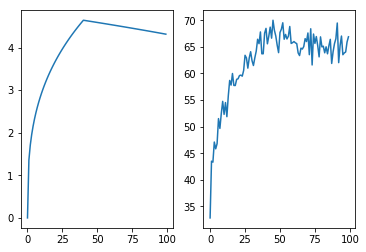

10


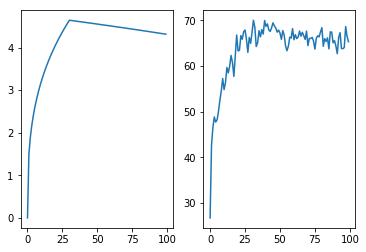

11


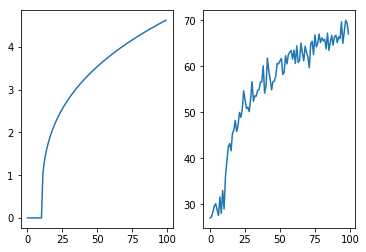

12


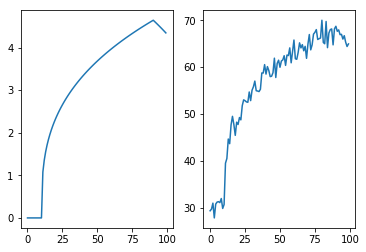

13


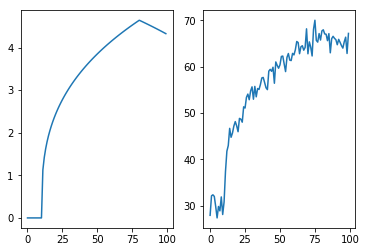

14


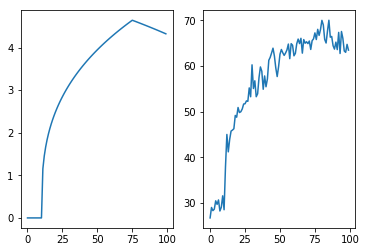

15


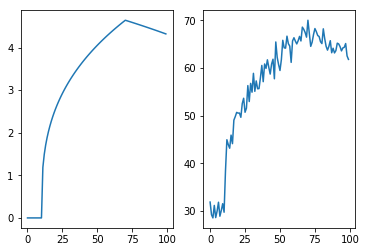

16


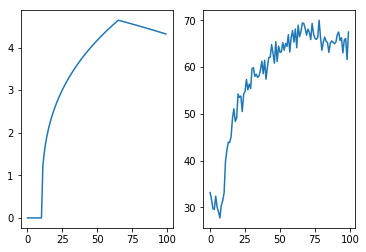

17


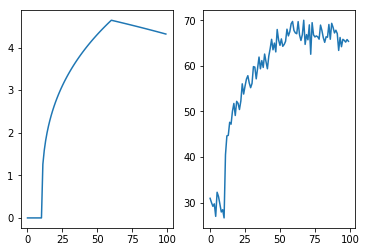

18


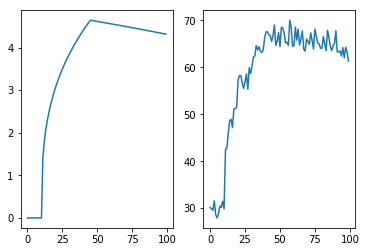

19


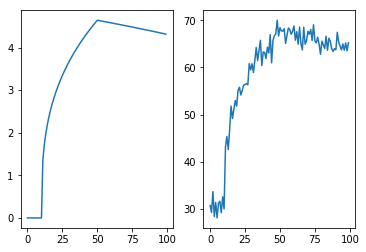

20


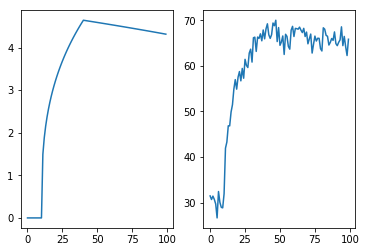

21


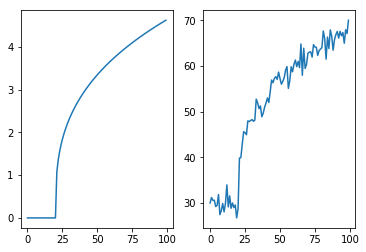

22


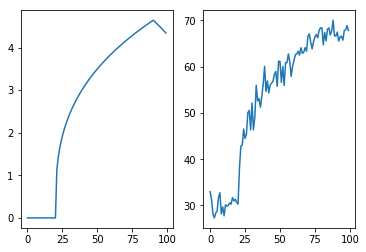

23


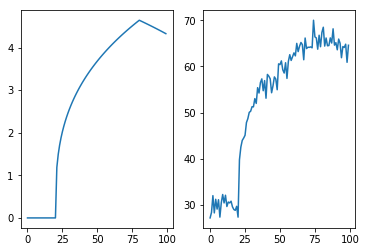

24


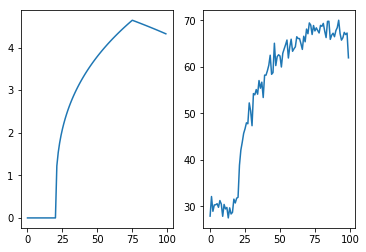

25


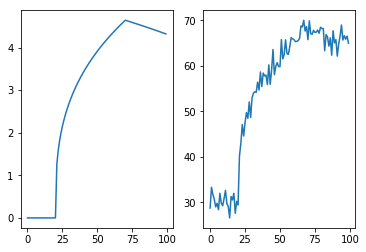

26


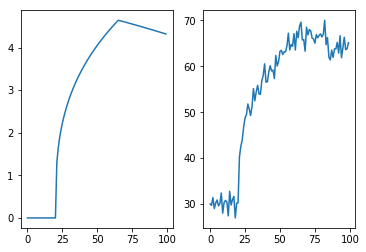

27


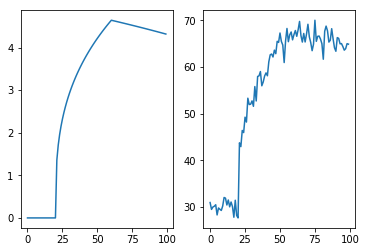

28


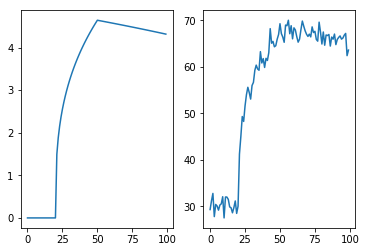

29


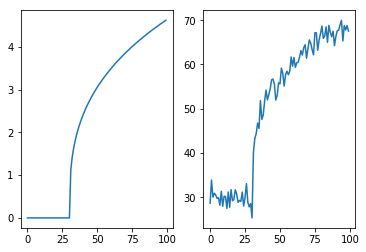

30


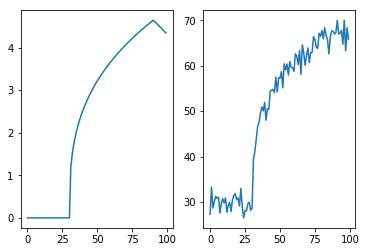

31


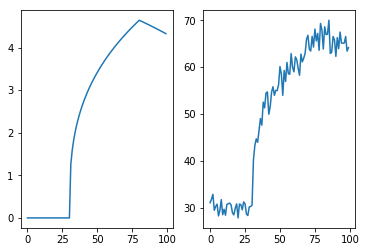

32


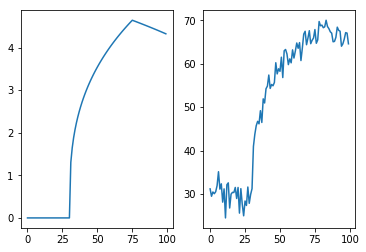

33


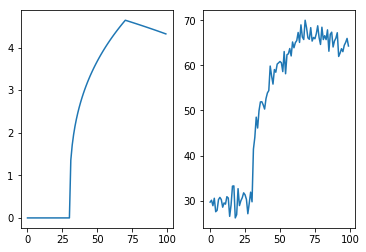

34


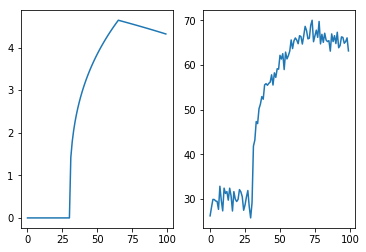

35


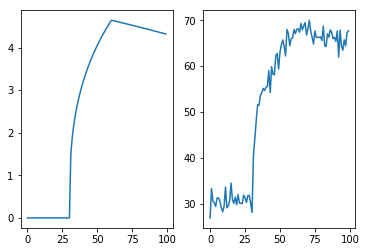

36


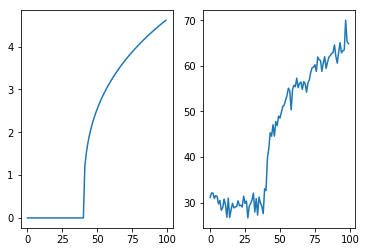

37


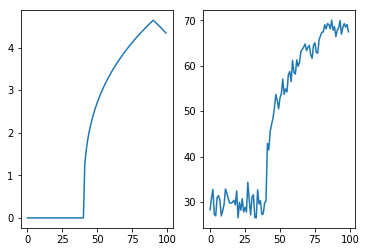

38


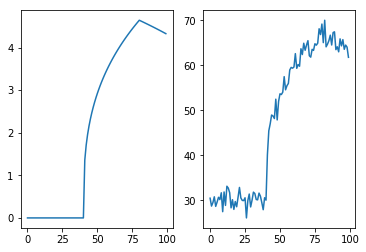

39


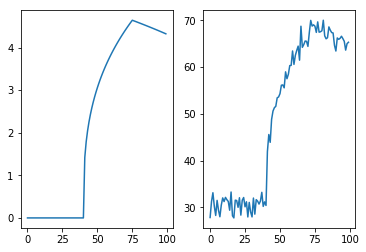

40


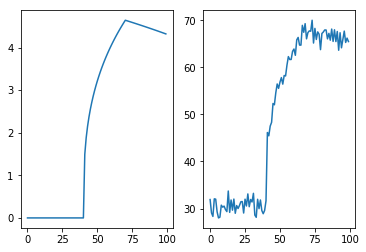

41


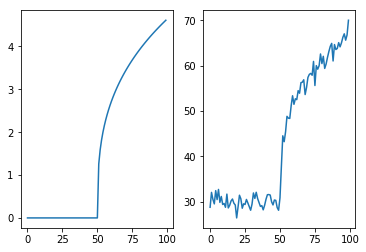

42


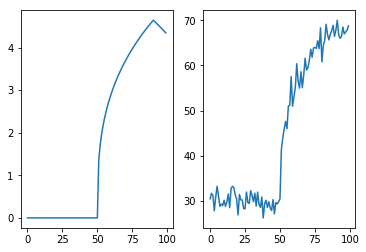

43


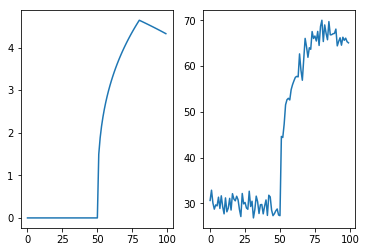

44


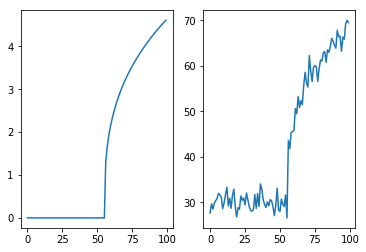

45


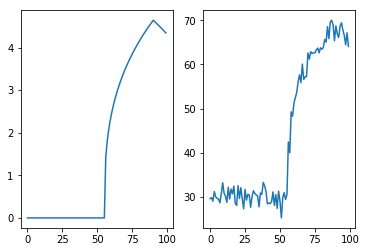

46


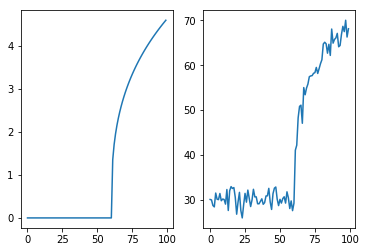

47


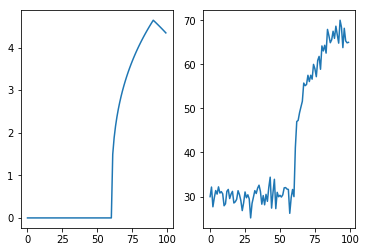

48


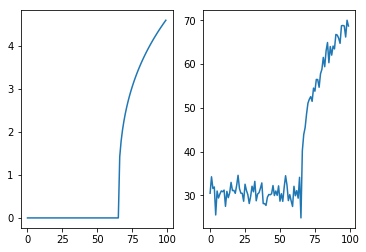

49


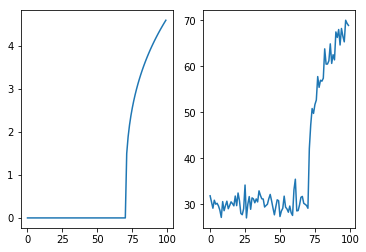

In [26]:
## Load Library
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd

## Definations
def Generate_pattern_with_both_ends(x,min_value,max_value,start_distance,end_distance):
    total_points=100
    max_mid_val=80
    k=0
    for i in range(start_distance.shape[0]):
        left_points=total_points-start_distance[i]-end_distance
        ## Finding Slope if end_distance is varying
        slope=(max_value-min_value)/left_points
        for j in range(slope.shape[0]):
            if(left_points[j]<30):
                continue;
            out=np.arange(min_value,max_value,slope[j])
            end_index=out.shape[0] + start_distance[i]
            x[k,0:start_distance[i]]=min_value
            x[k,start_distance[i]:end_index]=out
            x[k,end_index:]=np.arange(max_value,max_mid_val,(max_mid_val-max_value)/end_distance[j])   
            x[k]=np.cbrt(x[k])
            k=k+1
    return x,k
    
    

## Initiaisation
total_points=100
no_of_shifts=60

## Defining array where all shifted version will be saved
x=np.zeros([no_of_shifts,total_points])

start_distance=np.array([0,10,20,30,40,50,55,60,65,70])
end_distance=np.array([0,10,20,25,30,35,40,55,50,60,70])
## Generate_pattern with varying slope
x,index=Generate_pattern_with_both_ends(x,0,100,start_distance,end_distance)
noise=np.random.normal(0,0.2,[index,100])
signal=x[:index]+noise
print(index)
for i in range(index):
    signal[i]=((signal[i]/max(signal[i]))*40)+30
    print(i)
    plt.subplot(121)
    plt.plot(x[i])
    plt.subplot(122)
    plt.plot(signal[i])
    plt.show()
    
label=np.chararray(index,itemsize=50)
label[:]='Convex_rise_with_decreasing_ends'

cause=np.chararray(100,itemsize=50)
cause[:]='Overheated oil'

temp_sig=pd.DataFrame({'Pattern':label})
temp_sig=temp_sig.join(pd.DataFrame(signal[0:index]))
sig=sig.append(temp_sig,ignore_index=True)
sig['label']=pd.Series(cause,index=sig.index)
#sig.to_csv('Convex_rise.csv')
